In [ ]:
!pip install git+https://github.com/SynBioUC/flapjack.git --quiet

In [ ]:
#uncomment when this work
!pip install git+https://github.com/SynBioUC/LOICA.git --quiet

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
% cd /content/gdrive/My Drive/

/content/gdrive/My Drive


In [ ]:
#uncomment if you dont have LOICA cloned in your drive or to update it
#!git clone https://github.com/SynBioUC/LOICA.git

In [ ]:
% cd LOICA/

/content/gdrive/My Drive/LOICA


In [ ]:
!pip install -e .

Obtaining file:///content/gdrive/My%20Drive/LOICA
  Attempting uninstall: loica
    Found existing installation: loica 0.0
    Uninstalling loica-0.0:
      Successfully uninstalled loica-0.0
  Running setup.py develop for loica


In [ ]:
from flapjack import *
from loica import *

import numpy as np

from scipy.signal import savgol_filter
from scipy.optimize import least_squares

import matplotlib.pyplot as plt


color_inverse = 'dodgerblue'
color_direct = 'organgered'

%matplotlib inline

SMALL_SIZE = 6
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title

In [ ]:
seed = 153
color_gauss = 'turquoise'
color_sumgauss = 'limegreen'

In [ ]:
def growth_rate(t):
    B0 = 0.01
    mu_max = 1
    Bmax = 1
    l = 1
    return gompertz_growth_rate(t, B0, Bmax, mu_max, l)

def biomass(t):
    return gompertz(t, 0.01, 1, 1, 0.5)

#start the step and ramp at different times, randoms. Use t to multiply to the max slope that the moethod can reconstruct
def ramp(t,start,slope):
    return np.maximum(start,slope*t)#max(0,t)

def step(t,start):
    if t<start:
        s=0
    
    if t>=start:

    return np.heaviside(t,1)#(t>=start)*hval

def step0(t):
    return np.heaviside(t,1)#(t>=start)*hval

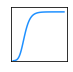

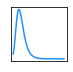

In [ ]:
plt.figure(figsize=(1,1), frameon=False)
t = np.linspace(0, 24, 100)
plt.plot(biomass(t), '-', color=color_inverse)
plt.ylim([0,1.1])
plt.xticks([])
plt.yticks([])
plt.savefig('growth_thumb.png', dpi=300)

plt.figure(figsize=(1,1), frameon=False)
plt.plot(growth_rate(t), '-', color=color_inverse)
#plt.ylim([0,1.1])
plt.xticks([])
plt.yticks([])
plt.savefig('growth_rate_thumb.png', dpi=300)

([], <a list of 0 Text major ticklabel objects>)

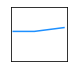

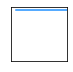

In [ ]:
plt.figure(figsize=(1,1), frameon=False)
t = np.linspace(0, 24, 100)
start = 0.1
slope = 0.01
hval = 0.5
plt.plot(t,ramp(t,start,slope), '-', color=color_inverse)
plt.ylim([-1,1])
plt.xticks([])
plt.yticks([])
#plt.savefig('growth_thumb.png', dpi=300)

plt.figure(figsize=(1,1), frameon=False)
plt.plot(step(t), '-', color=color_inverse)
plt.ylim([-1,1.1])
plt.xlim([-1,10])
plt.xticks([])
plt.yticks([])
#plt.savefig('growth_rate_thumb.png', dpi=300)

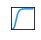

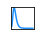

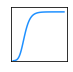

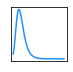

In [ ]:
def brownian_profile(t0, tmax, nt, sigma, seed):
    np.random.seed(seed)
    steps = np.random.lognormal(size=(nt,), sigma=sigma)
    profile = np.cumprod(steps)
    profile = savgol_filter(profile, 21, 2)
    profile = profile / profile.max()
    t = np.linspace(t0, tmax, nt)
    return interp1d(t, profile)

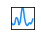

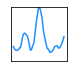

In [ ]:
sizes = ([0.414,1])
for n in sizes:
    plt.figure(figsize=(n,n), frameon=False)
    t = np.linspace(0, 24, 100)
    for i in range(1):
        plt.plot(t, brownian_profile(0, 24, 100, 0.25, seed)(t), '-', color=color_inverse)
        plt.ylim([0,1])
        plt.xticks([])
        plt.yticks([])
        plt.savefig('profile_thumb_%f.png'%n, dpi=300)

In [ ]:
rep1 = Reporter(name = 'LFP')
s1 = Source( rep1, 1, profile=brownian_profile(0, 24, 100, 0.25, seed))
f1 = s1.forward_model(profile=s1.profile(t), odval=[1] * 100)
f1[0]

array([0.        , 0.06796023, 0.13124569, 0.19056736, 0.24663621,
       0.30016324, 0.35185943, 0.40243575, 0.45260319, 0.50307274,
       0.55455538, 0.60776209, 0.66391323, 0.72525047, 0.78588708,
       0.84879821, 0.9201986 , 1.00314922, 1.09998969, 1.20901423,
       1.3274117 , 1.45215369, 1.57962976, 1.70940386, 1.83770271,
       1.96324928, 2.0854761 , 2.20600713, 2.32359932, 2.435991  ,
       2.53849432, 2.63055219, 2.71186946, 2.78014926, 2.83465869,
       2.88568466, 2.93762555, 2.99483177, 3.05831381, 3.13187483,
       3.20948879, 3.29270093, 3.3914005 , 3.50883094, 3.64640971,
       3.80421957, 3.98391403, 4.18080342, 4.39199288, 4.6180869 ,
       4.8589748 , 5.1089748 , 5.35856376, 5.60210874, 5.83760919,
       6.06383967, 6.2787593 , 6.48031423, 6.66374666, 6.82755066,
       6.96790434, 7.09340518, 7.20955945, 7.31299686, 7.40471621,
       7.48491139, 7.5562869 , 7.61808063, 7.67478146, 7.73122322,
       7.78668315, 7.83643222, 7.88091458, 7.92228096, 7.96335

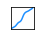

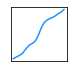

In [ ]:
sizes = ([0.414,1])
for n in sizes:
    plt.figure(figsize=(n,n), frameon=False)
    t = np.linspace(0, 24, 100)
    for i in range(1):
        plt.plot(f1[1].ravel(), f1[0].ravel(), '-', color=color_inverse)
        #plt.ylim([0,10])
        plt.xticks([])
        plt.yticks([])
        plt.savefig('profile_thumb2_%f.png'%n, dpi=300)

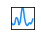

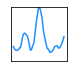

In [ ]:
sizes = ([0.414,1])
for n in sizes:
    plt.figure(figsize=(n,n), frameon=False)
    t = np.linspace(0, 24, 100)
    for i in range(1):
        plt.plot(t, brownian_profile(0, 24, 100, 0.25, seed)(t), '-', color=color_inverse)
    plt.ylim([0,1])
    plt.xticks([])
    plt.yticks([])
    plt.savefig('profile_thumb%f.png'%n, dpi=300)

In [ ]:
#we have the seed working 111, 145, 150, 153

#Gaussian Basis

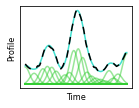

In [ ]:
t0,tmax = 0,24
nt = 100
n_blobs = 24
t = np.linspace(t0, tmax, nt)
means = np.linspace(t.min(), t.max(), n_blobs, endpoint=True)
var = t.max()/n_blobs

def residuals(profile):
    def func(x):
        heights = x
        gprofile = np.zeros_like(t)
        for mean,height in zip(means, heights):
            gaussian = height * np.exp(-(t-mean)*(t-mean) / var / 2) / np.sqrt(2 * np.pi * var)
            gprofile += gaussian
        return gprofile - profile
    return func

plt.figure(figsize=(2,1.5))
bprof = brownian_profile(0, 24, 100, 0.25, seed)(t)
lower_bounds = [0]*24
upper_bounds = [50]*24
bounds = [lower_bounds, upper_bounds]
res = least_squares(residuals(bprof), x0=[1]*24, bounds=bounds)
bheights = res.x


rbprof = np.zeros_like(t)
for mean,height in zip(means, bheights):
    gaussian = height * np.exp(-(t-mean)*(t-mean) / var / 2) / np.sqrt(2 * np.pi * var)
    rbprof += gaussian
    plt.plot(t, gaussian, '-', alpha=0.5, color= color_sumgauss)
plt.plot(t, rbprof, color=color_gauss)
plt.plot(t, bprof, 'k--', dashes=(5, 4))
plt.xlabel('Time')
plt.ylabel('Profile')
plt.xticks([])
plt.yticks([])
plt.savefig('gaussian_basis.png', dpi=300)

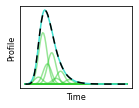

In [ ]:
plt.figure(figsize=(2,1.5))
gprof = gompertz_growth_rate(t, 0.01, 1, 1, 3)
lower_bounds = [0]*24
upper_bounds = [50]*24
bounds = [lower_bounds, upper_bounds]
res = least_squares(residuals(gprof), x0=[1]*24, bounds=bounds)
bheights = res.x


rgprof = np.zeros_like(t)
for mean,height in zip(means, bheights):
    gaussian = height * np.exp(-(t-mean)*(t-mean) / var / 2) / np.sqrt(2 * np.pi * var)
    rgprof += gaussian
    plt.plot(t, gaussian, '-', alpha=0.5, color=color_sumgauss)
plt.plot(t, rgprof, color=color_gauss)
plt.plot(t, gprof, 'k--', dashes=(5, 4))
plt.xlabel('Time')
plt.ylabel('Profile')
plt.xticks([])
plt.yticks([])
plt.savefig('gr_gaussian_basis.png', dpi=300)

In [ ]:
#yey!